In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv
import math

#-----------inputs--------------------
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
concrete_density = cv.concrete_density
#-------------------------------------

script_dir = os.path.abspath('data') # absolute file path in Jupyter

# Read the inner hull coordinates
file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

# Read the outer hull coordinates
file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

print([float(x) for x in x_in.unique()])
print([float(x) for x in x_out.unique()])


[0.0, 99.90625, 199.8125, 299.71875, 399.625, 499.53125, 599.4375, 699.34375, 799.25, 899.15625, 999.0625, 1098.96875, 1198.875, 1298.78125, 1398.6875, 1498.59375, 1598.5, 1698.40625, 1798.3125, 1898.21875, 1998.125, 2098.03125, 2197.9375, 2297.84375, 2397.75, 2497.65625, 2597.5625, 2697.46875, 2797.375, 2897.28125, 2997.1875, 3097.09375, 3197.0, 3296.90625, 3396.8125, 3496.71875, 3596.625, 3696.53125, 3796.4375, 3896.34375, 3996.25, 4096.15625, 4196.0625, 4295.96875, 4395.875, 4495.78125, 4595.6875, 4695.59375, 4795.5, 4895.40625, 4995.3125, 5095.21875, 5195.125, 5295.03125, 5394.9375, 5494.84375, 5594.75]
[0.0, 100.892857, 201.785714, 302.678571, 403.571429, 504.464286, 605.357143, 706.25, 807.142857, 908.035714, 1008.928571, 1109.821429, 1210.714286, 1311.607143, 1412.5, 1513.392857, 1614.285714, 1715.178571, 1816.071429, 1916.964286, 2017.857143, 2118.75, 2219.642857, 2320.535714, 2421.428571, 2522.321429, 2623.214286, 2724.107143, 2826.0, 2925.892857, 3026.785714, 3127.678571, 322

### Inner Volume
This section solves for the volume contained within the bounds of the inner hull at each station (the volume of air in which you could sit, not the volume of concrete)


In [44]:
# Inner Hull Volume: Assume station is filled up with concrete
station_no = x_in.nunique() # number of stations
station = x_in.unique() # location of each station

print(station_no)

# Array of the inner hull volume of each station
vol_in = []

plotInnerHull = [[], []]
plotInnerStation = []

crossSectionArea = [0] * (station_no-1)

# Loop through each station
for k in range(0,station_no-1,1):
    plotInnerStation.append([[], []])

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # The contents of this loop stores the YZ coordinates of the inner hull at stations k and k+1
    # Loop through each x coordinate in the inner hull
    for i in range(0,len(x_in),1):

        # If the coordinate is aligned with the first station on the X-axis, store this XYZ coordinate
        if x_in[i] == X1_value:
            Y1.append(y_in[i])
            Z1.append(z_in[i])
            plotInnerHull[0].append(y_in[i])
            plotInnerHull[1].append(z_in[i])
            plotInnerStation[k][0].append(y_in[i])
            plotInnerStation[k][1].append(z_in[i])

        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_in[i] == X2_value:
            Y2.append(y_in[i])
            Z2.append(z_in[i])

    # Calculate the volume of this station
    volume = 0
    # Front of the canoe (assumed to be a pyramid shape)
    if k == 0:
        l = abs(max(Y2)-min(Y2))
        w = abs(max(Z2)-min(Z2))
        h = abs(X2_value - X1_value)
        # crossSectionArea[k] -= l * w
        volume = l*w*h/3
    # Back of the canoe (assumed to be a pyramid shape)
    elif k == station_no-2:
        l = abs(max(Y1)-min(Y1))
        w = abs(max(Z1)-min(Z1))
        h = abs(X1_value - X2_value)
        # crossSectionArea[k] -= l * w
        volume = l*w*h/3
    # Any other valid station of the canoe
    elif len(Y1)/2 != 0: #<?> why not just len(Y1) != 0

        # Loops through half of YZ coordinates at the given station (since the canoe is symmetrical)
        n = (len(Y1)-1)//2
        for j in range(0,n,1):

            # print(len(Y1), len(Y2), k, station_no-1)

            # calculate the area contained within a horizontal strip bound by two adjacent points
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            # Store the negative area of the inner hull (to be subtracted from outer hull) <?> DOES THIS DO ANYTHING
            crossSectionArea[k] -= ((abs(Y1[j])-abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1]) + (abs(Y2[j])-abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])) / 2
            volume += abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n] - Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n] - Z2[n-1])/2*2
        # Store the negative area of the inner hull (to be subtracted from outer hull)
        crossSectionArea[k] -= (area1 + area2) / 2
        volume += abs(X1_value - X2_value)*(area1 + area2)/2

    # Append the volume to the array of all station inner hull volumes
    vol_in.append(volume)



print(vol_in)

print(station_no*4)

57
[276381.7431771857, 1535921.4459068794, 3028457.020903587, 4343674.088849716, 5535900.131827332, 6634444.14862503, 7660049.8804887375, 8622767.93299188, 9526920.665547488, 10374456.426163383, 11166490.125268737, 11903892.036193455, 12587486.894949302, 13218116.164786033, 13796658.046180766, 14324036.48744078, 14801228.280007424, 15229271.028339745, 15609272.774822326, 15942424.306495883, 16230015.391148055, 16473456.455265, 16674309.005947651, 16834330.389096502, 16955544.056358475, 17040361.59128669, 17091832.63718039, 17114409.53562295, 17114409.53562295, 17091832.63718039, 17040361.59128669, 16955544.056358475, 16834330.389096502, 16674309.005947651, 16473456.455265, 16230015.391148055, 15942424.306495883, 15609272.774822326, 15229271.028339745, 14801228.280007424, 14324036.48744078, 13796658.046180766, 13218116.164786033, 12587486.894949302, 11903892.036193455, 11166490.125268737, 10374456.426163383, 9526920.665547488, 8622767.93299188, 7660049.8804887375, 6634444.14862503, 5535

### Outer Volume
This section solves for the volume contained within the bounds of the outer hull at each station (not the volume of concrete)


In [45]:
# Outer Hull Volume: Assume station is filled up with concrete
station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

# Array of the outer hull volume of each station
vol_out = []

plotOuterHull = [[], []]
plotOuterStation = []

# Loop through each station
for k in range(0,station_no-1,1):
    plotOuterStation.append([[], []])

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the inner hull
    for i in range(0,len(x_out),1):

        # If the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
            plotOuterHull[0].append(y_out[i])
            plotOuterHull[1].append(z_out[i])
            plotOuterStation[k][0].append(y_out[i])
            plotOuterStation[k][1].append(z_out[i])

        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    
    # Calculate the volume of this station
    volume = 0
    # Front of the canoe
    if k == 0:
        l = abs(max(Y2)-min(Y2))
        w = abs(max(Z2)-min(Z2))
        h = abs(X2_value - X1_value)
        # crossSectionArea[k] += l * w
        volume = l*w*h/3
    # Back of the canoe
    elif k == station_no-2:
        l = abs(max(Y1)-min(Y1))
        w = abs(max(Z1)-min(Z1))
        h = abs(X1_value - X2_value)
        # crossSectionArea[k] += l * w
        volume = l*w*h/3
    # Any other valid station of the canoe
    elif len(Y1)/2 != 0:
        n = (len(Y1)-1)//2
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            crossSectionArea[k] += ((abs(Y1[j])-abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1]) + (abs(Y2[j])-abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])) / 2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n] - Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n] - Z2[n-1])/2*2
        crossSectionArea[k] += (area1 + area2) / 2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2

    # Append the volume to the array of all station inner hull volumes
    vol_out.append(volume)


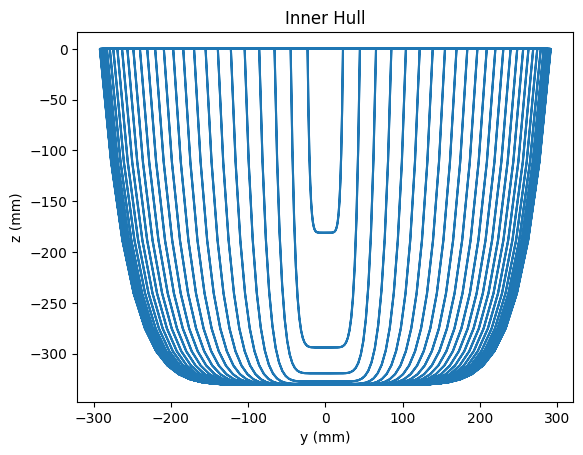

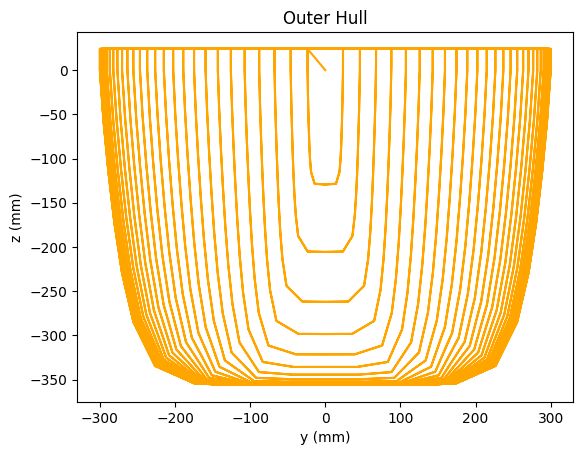

[0.0, 24.0, 19.2, 14.4, 9.6, 4.8, 0.0, 0.0, -14.413405, -28.825492, -43.236187, -57.645505, -72.052581, -86.454726, -100.84473, -115.19057, -128.445197, -129.435365, -128.445197, -115.19057, -100.84473, -86.454726, -72.052581, -57.645505, -43.236187, -28.825492, -14.413405, 0.0, 0.0, 4.8, 9.6, 14.4, 19.2, 24.0, 24.0, 19.2, 14.4, 9.6, 4.8, 0.0, 0.0, -23.494869, -46.986362, -70.474313, -93.958753, -117.437037, -140.90169, -164.330679, -187.607314, -205.127112, -205.594145, -205.127112, -187.607314, -164.330679, -140.90169, -117.437037, -93.958753, -70.474313, -46.986362, -23.494869, 0.0, 0.0, 4.8, 9.6, 14.4, 19.2, 24.0, 24.0, 19.2, 14.4, 9.6, 4.8, 0.0, 0.0, -30.574975, -61.143986, -91.706752, -122.263265, -152.808118, -183.326933, -213.773611, -243.849284, -261.702891, -262.056962, -261.702891, -243.849284, -213.773611, -183.326933, -152.808118, -122.263265, -91.706752, -61.143986, -30.574975, 0.0, 0.0, 4.8, 9.6, 14.4, 19.2, 24.0, 24.0, 19.2, 14.4, 9.6, 4.8, 0.0, 0.0, -35.638139, -71.266

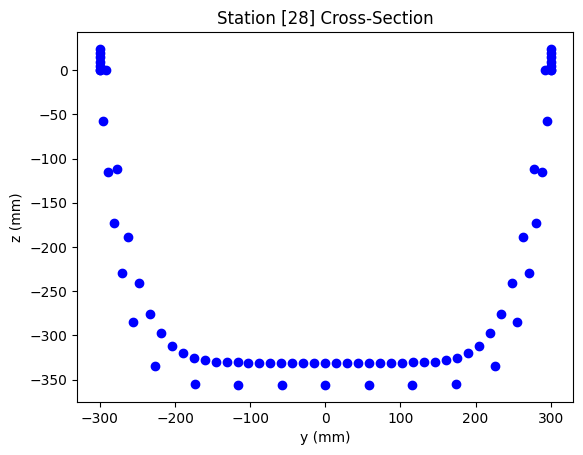

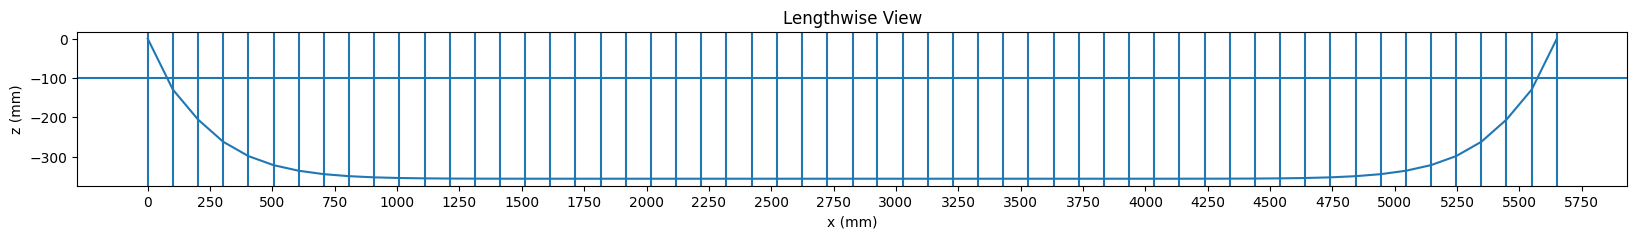

In [ ]:

plt.plot(plotInnerHull[0], plotInnerHull[1])
plt.title('Inner Hull')
plt.xlabel('y (mm)')
plt.ylabel('z (mm)')
plt.show()

plt.plot(plotOuterHull[0], plotOuterHull[1], c='orange')
plt.title('Outer Hull')
plt.xlabel('y (mm)')
plt.ylabel('z (mm)')
plt.show()

print(plotOuterHull[1])

view_stations = [28]
key_station = 28
for view_station in view_stations:
    # plt.scatter(plotInnerStation[view_station][0], plotInnerStation[view_station][1], c=('blue' if view_station == key_station else 'green'))
    plt.plot(plotOuterStation[view_station][0], plotOuterStation[view_station][1], c=('blue' if view_station == key_station else 'green'))
plt.title(f'Station {view_stations} Cross-Section')
plt.xlabel('y (mm)')
plt.ylabel('z (mm)')
plt.show()

# Plot lenthwise
plt.figure(figsize=(20, 2))
plt.plot(station, [0] + [min(plotOuterStation[x][1]) for x in range(1, len(station)-1)] + [0])
plt.axhline(-100)
for st in station:
    plt.axvline(st)
plt.xticks(range(0, 6000, 250))
plt.title(f'Lengthwise View')
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
plt.show()

# for i in range(len(printCrossSectionYIn)):
#     print(printCrossSectionYIn[i] - printCrossSectionYOut[i], printCrossSectionZIn[i] - printCrossSectionZOut[i])

### Canoe Volume and Mass
This section solves for the actual volume and mass of concrete at each station (stat_vol and stat_mass)
and the total canoe volume and mass (canoe_vol and canoe_m )

In [47]:
# This section solves for the volume and mass at each station, as well as the total canoe volume and mass
# Volume at each station = outer hull volume - inner hull volume
stat_vol = []
for i in range(0,len(vol_in),1):
    stat_vol.append(vol_out[i] - vol_in[i])

# Calculate the mass using the volume at each station
canoe_vol = 0
stat_mass = []
for i in range(0,len(stat_vol),1):
    canoe_vol = canoe_vol + stat_vol[i]
    stat_mass.append(stat_vol[i]/(10**9)*concrete_density)
canoe_m = canoe_vol/(10**9)*concrete_density

print('The mass of canoe is ', canoe_m, ' kg.')

print(sum(stat_mass))

The mass of canoe is  131.7341029786326  kg.
131.7341029786326


# Display Case Starts Here! :D

In [ ]:
# Calculate Shear Force for Display Case
stand_force = [canoe_m/2, canoe_m/2]

length = max(x_out)
stand_po = [length/3, length/3*2] # two stands spaced equally
print("Stand Positions: ", stand_po)

stat_x = []
for i in range(0,len(station)-1,1):
    stat_x.append((station[i]+station[i+1])/2)

# Calculate the shear force
g = 9.81
x = []
shear = []
# Loop through the length of the canoe
for i in range(0,int(length),1):
    # Append the current distance travelled along the length of the canoe onto x
    x.append(i)

    # Calculate the shear force for this station
    shear_force = 0

    # Loop through each station
    for j in range(0,len(stat_x),1):
        # For each station we have moved past along the length of the canoe, subtract it from the shear force
        if i >= stat_x[j]:
            shear_force += (-1)*stat_mass[j]*g

    # Loop through each stand position
    for k in range(0,len(stand_po),1):
        # For each stand we have moved past along the length of the canoe, add it to the shear force
        if i >= stand_po[k]:
            shear_force += stand_force[k]*g

    # Append the shear force summed at this length along the canoe
    shear.append(shear_force)



Stand Positions:  [1883.3333333333333, 3766.6666666666665]


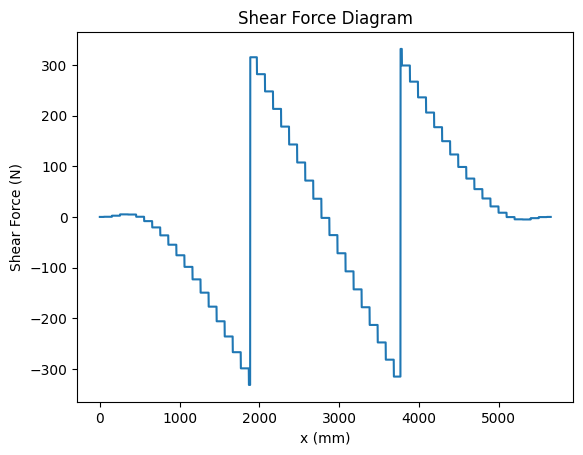

In [49]:
# Plot Shear Force Diagram
plt.plot(x,shear)
plt.title('Shear Force Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Shear Force (N)')
plt.show()

distToNextStation = [j-i for i, j in zip(station[:-1], station[1:])]

# Track mm distance of station for paddler positions
mm_traveled = 0

Station_by_length = []

for i in range(0, len(station)-1):

    delta_mm_traveled = mm_traveled + float(distToNextStation[i])

    # Any distance between the distance travlled (rounded) and the new distance travelled (larger due to more paddlers) (also rounded) will be saved. Anything else is discarded
    for j in range(round(mm_traveled), round(delta_mm_traveled)):
        Station_by_length.append(i)

    mm_traveled = delta_mm_traveled


# Export points to csv file:
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Shear': shear})

csv_file = 'Length_vs_Shear_Display_Stand.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [50]:
# Calculate Bending Moment for Display Case
moment = []
moment.append(0)
bending_moment = 0
# Loop through the length of the canoe
for i in range(0,len(x)-1,1):
    # Calculate bending moment using shear
    bending_moment += (x[i+1]-x[i])*shear[i+1]/1000
    moment.append(bending_moment)
    

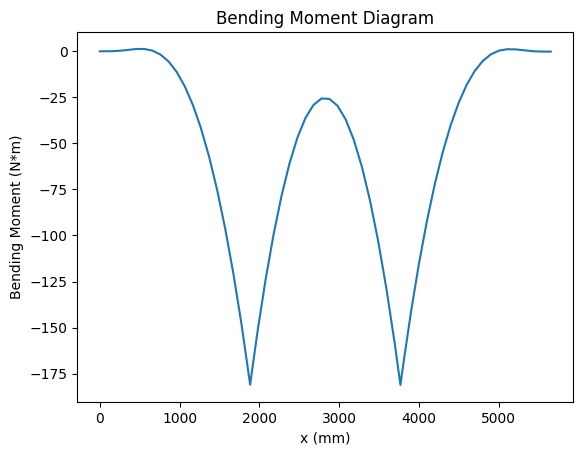

In [51]:
# Plot Bending Moment Diagram
plt.plot(x,moment)
plt.title('Bending Moment Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Bending Moment (N*m)')
plt.show()

# Export points to csv file:
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Moment': moment})

csv_file = 'Length_vs_Moment_Display_Stand.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

### Station Information
This section writes the volume, mass, weight, distance to next station, width, and cross-sectional area of each station to the file StationInformation.csv


In [52]:
stat_weight = []
for i in range(0,len(stat_vol),1):
    station_weight = stat_mass[i]*g
    stat_weight.append(station_weight)

stat_no = np.arange(1, len(stat_vol)+1, 1)

width = []

for k in range(0,len(stat_no)-1,1):
    X1_value = station[k]
    Y1 = []

    for i in range(0,len(x_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])

    width.append(max(Y1) - min(Y1))

width.append(0)

df1 = pd.DataFrame(data={'Station Number': stat_no, 'Volume (mm^3)': stat_vol, 'Mass (kg)': stat_mass, 'Weight (N)': stat_weight, 'Distance to Next Station (mm)': distToNextStation, 'Width (mm)': width, 'Cross-Sectional Area (mm^2)': crossSectionArea})
df1['Volume (mm^3)'] = df1['Volume (mm^3)']/(10**9)

csv_file = 'Station Information.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [53]:
max(shear)

331.29144634223144

In [54]:
min(shear)

-331.29144634223155

In [55]:
np.sum(shear)

-157.76899492201483

In [56]:
# Export Display Stand Shear Force and Bending Moment to CSV files
titles = ['Positive Shear [N]', 'Negative Shear [N]', 'Positive Bending Moment [Nm]', 'Negative Bending Moment [Nm]', 'Moment at the end [Nm]']
values = [max(shear), min(shear), max(moment), min(moment), moment[len(moment)-1]]
station_no = []
max_width = []
max_depth = []
station_t = [] # Station thickness

for value in [max(shear), min(shear)]:
    shear_index = shear.index(value)
    xshear = x[shear_index]
    for i in range(0,len(station)-1,1):
        if (xshear >= station[i] and xshear < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))

for value in [max(moment), min(moment)]:
    moment_index = moment.index(value)
    xmoment = x[moment_index]
    for i in range(0,len(station)-1,1):
        if (xmoment >= station[i] and xmoment < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))
    
station_no.append(len(station)-1)  
max_width.append('')
max_depth.append('')
station_t.append('')

df1 = pd.DataFrame(data={'': titles, 'Value': values, 'Station No': station_no, 'Max Width [mm]': max_width, 'Max Depth [mm]': max_depth, 'Station Thickness [mm]': station_t})

csv_file = 'Shear_and_Moment_Display_Stand.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)